## 미국의 중심 도시인 보스턴의 1970년대 거주지에 대한 데이터를 바탕으로 주택 가격을 예축해보자!

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler    # 스탠다드 스케일러 임포트

### 데이터 수집
- csv 파일 업로드

In [4]:
data = pd.read_csv("data/boston_house.csv")
data
# 정답 컬러은 MEDV이며 단위당 1000달러

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### 데이터 전처리
- 결측치 및 이상치는 없음
- 추후 특성확장 진행 예정

### 탐색적 데이터 분석

In [7]:
# 특성간 상관계수 출력
 # 상관계수 : 하나의 값이 변동 될 때 나머지 하나의 값이 어떻게 변동되는지에 대한 계수(-1이면 완전반비례, 1이면 완전비례, 0이면 상관없음)
data.corr()     # corr은 기본적으로 피어슨 상관계수로 진행

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


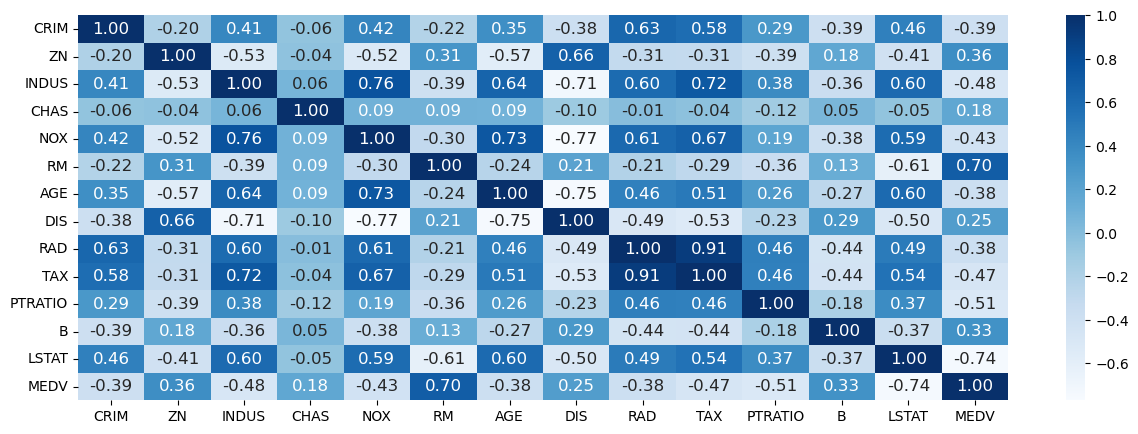

In [11]:
# 상관계수 히트맵
plt.figure(figsize=(15,5))

sns.heatmap(data=data.corr(), 
            annot=True,                  # 각 셀 값 표시
            fmt='.2f',                   # 소숫점 표시 자릿수
            annot_kws={'size':12},       # 수치 사이즈
            cmap='Blues'                 # 히트맵 색상
           );

https://matplotlib.org/stable/tutorials/colors/colormaps.html

- 주택가격(MEDV)과 상관관계가 높은 특성은 RM(주택당 방 개수), LSTAT(소득 하위계츨 비율)

### 모델링(모델 선택, 학습, 평가)

In [13]:
# 문제,정답 및 학습, 평가 데이터로 분리시켜보세요(학습, 평가 데이터 비율은 7:3)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]    # 맨 마지막 컬럼인 MEDV

In [14]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [17]:
# train_test_split 함수 사용
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=5
                                                  )

In [18]:
# 개수가 잘 맞는지 확인
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


### 선형회귀 모델 적용

In [23]:
# 선형회귀 모델 임포트
from sklearn.linear_model import LinearRegression
# MSE 평가 지표 임포트
from sklearn.metrics import mean_squared_error

In [24]:
# 선형회귀 모델 루트(모델 튜닝을 위한 하이퍼피라미터가 없음)
linear_model = LinearRegression()

In [25]:
linear_model.fit(X_train, y_train)      # 학습

LinearRegression()

In [26]:
# 학습된 선형회귀 모델에 들어간 데이터의 특성 명칭 출력
linear_model.feature_names_in_

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype=object)

In [27]:
# 각 특성별 weight(가중치)값 출력
linear_model.coef_

array([-1.54486040e-01,  4.13948217e-02, -2.53765225e-02,  7.86055259e-01,
       -1.29365836e+01,  4.03952301e+00, -1.05354914e-02, -1.33498644e+00,
        3.18272501e-01, -1.26427463e-02, -9.77287564e-01,  1.26714702e-02,
       -4.62052176e-01])

In [28]:
# 선형 회귀 수식의 y절편값 출력
linear_model.intercept_

np.float64(31.730351296497542)

- 최종 수식은 y = w1x1 + w2x2 + w3x3 + ... + w13x13 + b

In [30]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


#### 상관계수와 weight의 관계
- 정답 컬럼과 상관계수가 높을 수록 해당 특성의 weight값의 절대값이 높아지는 경향이 있으니, w값은 다른 특성들과의 조합에 따라 달라질 수 있으므로 상관계수가 높다고 해서 해당 특성의 weight가 반드시 높다고 볼 수는 없음
- 즉, 상관계수는 두 변수(특성)간의 상관성 정도이고, **weight는 입력되는 모든 특성들을 다 고려하여 정답(y)을 예측함에 있어 중요한 정도**라고 볼 수 있음
- 따라서 weight값과 상관계수를 같이 고려해주는 것이 더 좋음

### 모델 평가
- MSE, RMSE 확인

In [31]:
pred_train = linear_model.predict(X_train)
pred_test = linear_model.predict(X_test)

In [32]:
pred_train

array([11.43089977, 13.71853538, 26.41859051, 31.68658809, 11.05108925,
       24.77287039, 28.95313551, 32.22587554, 15.6177651 , 30.38543468,
        9.99826193, 34.64053591, 25.63945823, 20.24323288, 15.54144862,
       13.0360023 , 30.45219023, 13.26584372, 24.4609007 , 20.5425272 ,
       13.6812139 , 21.84987198, 14.10663647, 18.62709845, 22.16843572,
       33.47913738, 22.3937664 , 16.71951872, 30.89456978, 38.60764037,
       26.50840182, 25.96896355, 15.17045057, 15.84735641, 35.92045455,
       22.7882874 , 33.55299704, 25.26574698, 20.88235588, 17.13362298,
       23.490643  , 19.85788008, 30.32364534, 16.46744125, 25.52727638,
       26.73926876, 23.93506871, 22.78944197, 32.93367439, 18.77301671,
       30.83844599, 28.78217382, 13.33721859, 32.78335066, 27.66370076,
       19.57868458, 35.50253739, 14.34870194, 24.96727711, 28.37058023,
       22.34779744, 18.73440048, 20.95007301, 25.0458343 , 19.9139982 ,
       32.39458176, 23.79711493, 19.4009666 ,  7.01890961,  5.55

In [34]:
y_train

445    11.8
428    11.0
481    23.7
55     35.4
488    15.2
       ... 
486    19.1
189    34.9
495    23.1
206    24.4
355    20.6
Name: MEDV, Length: 354, dtype: float64

In [37]:
# MSE, RMSE 수치 확인
train_mse = mean_squared_error(pred_train, y_train)
test_mse = mean_squared_error(pred_test, y_test)

print("train 데이터 MSE :", train_mse)
print("test 데이터 MSE :", test_mse)
print("train, test의 MSE차이 :", abs(train_mse-test_mse))

print("="*45)

print("train 데이터 RMSE :", train_mse**0.5)                # np.sqrt를 사용해도 무방
print("test 데이터 RMSE :", test_mse**0.5)
print("train, test의 RMSE차이 :", abs(train_mse**0.5-test_mse**0.5))

train 데이터 MSE : 19.068341850927222
test 데이터 MSE : 30.697037704088643
train, test의 MSE차이 : 11.628695853161421
train 데이터 RMSE : 4.366731254717563
test 데이터 RMSE : 5.540490745781337
train, test의 RMSE차이 : 1.173759491063774


In [39]:
# 실제 정답(집 가격)의 평균 수치를 보자!
print("train :", y_train.mean())
print("test :", y_test.mean())

train : 22.556214689265534
test : 22.47828947368421


- 평균 집값은 약 22,000만 달러인데 전체오차(RMSE)가 4,300달러라면 상당히 큰 오차라고 볼 수 있음

### R2 Score확인

In [40]:
# 회귀 모델의 score함수는 정확도가 아니라 R2 score(회귀결정계수)가 출력됨
linear_model.score(X_train, y_train)

0.7611598772034454

In [41]:
linear_model.score(X_test, y_test)

0.6771696999851686

### 스케일링 적용
- 수치나 거리 기반 모델에는 스케일링을 적용하여 특성들 간 데이터 스케일을 맞춰주면 모든 특성에 대해 균형있게 weight에 영향을 미칠 수 있음(스케일링이 없으면 특성간 범위 차이가 큰 경우 수치가 큰 특성의 weight가 커질 가능성이 있음)
- 단, 무조건적인 성능향상이 있는 건 아니고 실제로 스케일링을 진행해서 효과가 있는지 테스트 해 볼 필요가 있음

In [42]:
# 스케일러 객체 생성
scaler_SS = StandardScaler()

In [43]:
# X_train데이터로 데이터의 범위들을 학습시킴
# (test데이터가 분리되어 있다면 항상 train데이터로만 학습시켜야함)
scaler_SS.fit(X_train)

StandardScaler()

In [44]:
# 실제로 일정한 범위로 수치 변경
trans_X_train = scaler_SS.transform(X_train)
trans_X_test = scaler_SS.transform(X_test)

In [45]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
445,10.67180,0.0,18.10,0,0.740,6.459,94.8,1.9879,24,666,20.2,43.06,23.98
428,7.36711,0.0,18.10,0,0.679,6.193,78.1,1.9356,24,666,20.2,96.73,21.52
481,5.70818,0.0,18.10,0,0.532,6.750,74.9,3.3317,24,666,20.2,393.07,7.74
55,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226,17.9,395.93,4.81
488,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,395.09,18.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,5.69175,0.0,18.10,0,0.583,6.114,79.8,3.5459,24,666,20.2,392.68,14.98
189,0.08370,45.0,3.44,0,0.437,7.185,38.9,4.5667,5,398,15.2,396.90,5.39
495,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391,19.2,393.29,17.60
206,0.22969,0.0,10.59,0,0.489,6.326,52.5,4.3549,4,277,18.6,394.87,10.97


In [46]:
trans_X_train

array([[ 0.87550928, -0.49961764,  1.06960848, ...,  0.81091271,
        -3.46382037,  1.61136934],
       [ 0.47466521, -0.49961764,  1.06960848, ...,  0.81091271,
        -2.87288804,  1.26563608],
       [ 0.27344444, -0.49961764,  1.06960848, ...,  0.81091271,
         0.3899569 , -0.67103236],
       ...,
       [-0.3972215 , -0.49961764, -0.18207157, ...,  0.34307845,
         0.39237921,  0.71471153],
       [-0.39107182, -0.49961764, -0.04812246, ...,  0.0623779 ,
         0.40977576, -0.21708177],
       [-0.4060033 ,  3.00699239, -1.33998725, ...,  1.65301436,
         0.20244847, -0.97600844]])

In [47]:
linear_model2 = LinearRegression()
# 스케일링 된 데이터로 학습
linear_model2.fit(trans_X_train, y_train)

LinearRegression()

In [48]:
pred_train_SS = linear_model2.predict(trans_X_train)
pred_test_SS = linear_model2.predict(trans_X_test)

In [50]:
# 스케일링 후 MSE, RMSE 수치 확인
train_mse = mean_squared_error(pred_train_SS, y_train)
test_mse = mean_squared_error(pred_test_SS, y_test)

print("train 데이터 MSE :", train_mse)
print("test 데이터 MSE :", test_mse)
print("train, test의 MSE차이 :", abs(train_mse-test_mse))

print("="*45)

print("train 데이터 RMSE :", train_mse**0.5)                
print("test 데이터 RMSE :", test_mse**0.5)
print("train, test의 RMSE차이 :", abs(train_mse**0.5-test_mse**0.5))

train 데이터 MSE : 19.068341850927226
test 데이터 MSE : 30.697037704088558
train, test의 MSE차이 : 11.628695853161332
train 데이터 RMSE : 4.366731254717563
test 데이터 RMSE : 5.54049074578133
train, test의 RMSE차이 : 1.173759491063767


- 무조건 거리, 수치 기반 모델이라고 스케일링 시 효과가 있는 것은 아님

### 선형회귀 모델 특성확장
- 선형회귀 모델은 데이터의 분포가 선형 수식으로 표현하기 힘든 분포라면 예측 정확도가 많이 낮아질 수 있음(데이터의 분포가 복잡해지면 회귀 직선만으로는 모든 데이터를 잘 설명할 수 없기 때문)
- 또한 선형회귀 모델을 모델 튜닝을 위한 하이퍼피라미터가 없음
- 따라서 데이터의 분포 자체에 영향을 많이 받게 되는데, 이 때 데이터의 복잡도를 높여서 모델이 패턴과 규칙을 더 잘 학습하게 만들어주면 성능을 높일 수 있음(데이터의 복잡도를 높인다는 것은 곧 특성(컬럼)의 개수를 늘려준다는 것과 같음)

In [51]:
# 특성들 간의 곱을 통해서 새로운 컬럼들을 만들어서 데이터의 복잡도를 높여보자!


# DF을 만들기 위해 데이터를 넣을 빈 딕셔너리 생성
extended_train_columns = {}

# X_train의 각 컬럼들을 서로서로 곱해서 만들어진 컬럼들을 딕셔너리에 추가
for col1 in X_train.columns :
    for col2 in X_train.columns :
        extended_train_columns[col1+'x'+col2] = X_train[col1] * X_train[col2]

extended_train_columns

{'CRIMxCRIM': 445    113.887315
 428     54.274310
 481     32.583319
 55       0.000172
 488      0.022759
           ...    
 486     32.396018
 189      0.007006
 495      0.032037
 206      0.052757
 355      0.011361
 Name: CRIM, Length: 354, dtype: float64,
 'CRIMxZN': 445    0.0000
 428    0.0000
 481    0.0000
 55     1.1799
 488    0.0000
         ...  
 486    0.0000
 189    3.7665
 495    0.0000
 206    0.0000
 355    8.5272
 Length: 354, dtype: float64,
 'CRIMxINDUS': 445    193.159580
 428    133.344691
 481    103.318058
 55       0.015994
 488      4.184856
           ...    
 486    103.020675
 189      0.287928
 495      1.734413
 206      2.432417
 355      0.203587
 Length: 354, dtype: float64,
 'CRIMxCHAS': 445    0.0
 428    0.0
 481    0.0
 55     0.0
 488    0.0
       ... 
 486    0.0
 189    0.0
 495    0.0
 206    0.0
 355    0.0
 Length: 354, dtype: float64,
 'CRIMxNOX': 445    7.897132
 428    5.002268
 481    3.036752
 55     0.005283
 488    0.091874
     

In [52]:
# 새롭게 만들어진 컬럼들을 데이터 프레임으로 만들기
extended_train_df = pd.DataFrame(extended_train_columns)

# 기존 X_train에 concat으로 붙여서 활용
extended_X_train = pd.concat([X_train, extended_train_df], axis=1)
extended_X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTATxCHAS,LSTATxNOX,LSTATxRM,LSTATxAGE,LSTATxDIS,LSTATxRAD,LSTATxTAX,LSTATxPTRATIO,LSTATxB,LSTATxLSTAT
445,10.67180,0.0,18.10,0,0.740,6.459,94.8,1.9879,24,666,...,0.0,17.74520,154.88682,2273.304,47.669842,575.52,15970.68,484.396,1032.5788,575.0404
428,7.36711,0.0,18.10,0,0.679,6.193,78.1,1.9356,24,666,...,0.0,14.61208,133.27336,1680.712,41.654112,516.48,14332.32,434.704,2081.6296,463.1104
481,5.70818,0.0,18.10,0,0.532,6.750,74.9,3.3317,24,666,...,0.0,4.11768,52.24500,579.726,25.787358,185.76,5154.84,156.348,3042.3618,59.9076
55,0.01311,90.0,1.22,0,0.403,7.249,21.9,8.6966,5,226,...,0.0,1.93843,34.86769,105.339,41.830646,24.05,1087.06,86.099,1904.4233,23.1361
488,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,...,0.0,10.99854,98.49924,1674.162,32.885454,72.24,12840.66,363.006,7135.3254,326.1636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,5.69175,0.0,18.10,0,0.583,6.114,79.8,3.5459,24,666,...,0.0,8.73334,91.58772,1195.404,53.117582,359.52,9976.68,302.596,5882.3464,224.4004
189,0.08370,45.0,3.44,0,0.437,7.185,38.9,4.5667,5,398,...,0.0,2.35543,38.72715,209.671,24.614513,26.95,2145.22,81.928,2139.2910,29.0521
495,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391,...,0.0,10.29600,99.79200,506.880,49.255360,105.60,6881.60,337.920,6921.9040,309.7600
206,0.22969,0.0,10.59,0,0.489,6.326,52.5,4.3549,4,277,...,0.0,5.36433,69.39622,575.925,47.773253,43.88,3038.69,204.042,4331.7239,120.3409


In [53]:
# test데이터도 동일하게 특성확장 진행
extended_test_columns = {}

# X_train의 각 컬럼들을 서로서로 곱해서 만들어진 컬럼들을 딕셔너리에 추가
for col1 in X_test.columns :
    for col2 in X_test.columns :
        extended_test_columns[col1+'x'+col2] = X_test[col1] * X_test[col2]

extended_test_columns

{'CRIMxCRIM': 226      0.146031
 292      0.001307
 90       0.002194
 373    123.389886
 273      0.049231
           ...    
 60       0.022296
 108      0.016389
 298      0.004181
 138      0.062400
 370     42.755382
 Name: CRIM, Length: 152, dtype: float64,
 'CRIMxZN': 226    0.0000
 292    2.8920
 90     0.0000
 373    0.0000
 273    4.4376
         ...  
 60     3.7330
 108    0.0000
 298    4.5262
 138    0.0000
 370    0.0000
 Length: 152, dtype: float64,
 'CRIMxINDUS': 226      2.369268
 292      0.178943
 90       0.159724
 373    201.056610
 273      1.544285
           ...    
 60       0.766012
 108      1.095851
 298      0.144838
 138      5.468122
 370    118.351556
 Length: 152, dtype: float64,
 'CRIMxCHAS': 226    0.00000
 292    0.00000
 90     0.00000
 373    0.00000
 273    0.22188
         ...   
 60     0.00000
 108    0.00000
 298    0.00000
 138    0.00000
 370    6.53876
 Length: 152, dtype: float64,
 'CRIMxNOX': 226    0.192599
 292    0.014858
 90     0.02

In [54]:
extended_test_df = pd.DataFrame(extended_test_columns)

# 기존 X_train에 concat으로 붙여서 활용
extended_X_test = pd.concat([X_test, extended_test_df], axis=1)
extended_X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTATxCHAS,LSTATxNOX,LSTATxRM,LSTATxAGE,LSTATxDIS,LSTATxRAD,LSTATxTAX,LSTATxPTRATIO,LSTATxB,LSTATxLSTAT
226,0.38214,0.0,6.20,0,0.504,8.040,86.5,3.2157,8,307,...,0.00,1.57752,25.16520,270.745,10.065141,25.04,960.91,54.462,1212.4994,9.7969
292,0.03615,80.0,4.95,0,0.411,6.630,23.4,5.1167,4,245,...,0.00,1.93170,31.16100,109.980,24.048490,18.80,1151.50,90.240,1865.4300,22.0900
90,0.04684,0.0,3.41,0,0.489,6.417,66.1,3.0923,2,270,...,0.00,4.30809,56.53377,582.341,27.243163,17.62,2378.70,156.818,3455.1058,77.6161
373,11.10810,0.0,18.10,0,0.668,4.906,100.0,1.1742,24,666,...,0.00,23.22636,170.58162,3477.000,40.826934,834.48,23156.82,702.354,13800.2130,1208.9529
273,0.22188,20.0,6.96,1,0.464,7.691,51.8,4.3665,3,223,...,6.58,3.05312,50.60678,340.844,28.731570,19.74,1467.34,122.388,2571.2666,43.2964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.14932,25.0,5.13,0,0.453,5.741,66.2,7.2254,8,284,...,0.00,5.95695,75.49415,870.530,95.014010,105.20,3734.60,259.055,5195.6965,172.9225
108,0.12802,0.0,8.56,0,0.520,6.474,97.1,2.4329,5,384,...,0.00,6.38040,79.43598,1191.417,29.851683,61.35,4711.68,256.443,4849.5948,150.5529
298,0.06466,70.0,2.24,0,0.400,6.345,20.1,7.8278,5,358,...,0.00,1.98800,31.53465,99.897,38.904166,24.85,1779.26,73.556,1830.1528,24.7009
138,0.24980,0.0,21.89,0,0.624,5.857,98.2,1.6686,4,437,...,0.00,13.30368,124.87124,2093.624,35.574552,85.28,9316.84,451.984,8358.2928,454.5424


In [55]:
# 특성 확장된 train 데이터의 문제와 정답으로 학습
linear_model3 = LinearRegression()
linear_model3.fit(extended_X_train, y_train)

LinearRegression()

In [57]:
ex_pred_train = linear_model3.predict(extended_X_train)
ex_pred_test = linear_model3.predict(extended_X_test)

In [58]:
ex_train_mse = mean_squared_error(ex_pred_train, y_train)
ex_test_mse = mean_squared_error(ex_pred_test, y_test)

print("train 데이터 MSE :", ex_train_mse)
print("test 데이터 MSE :", ex_test_mse)
print("train, test의 MSE차이 :", abs(ex_train_mse-ex_test_mse))

print("="*45)

print("train 데이터 RMSE :", ex_train_mse**0.5)                
print("test 데이터 RMSE :",ex_test_mse**0.5)
print("train, test의 RMSE차이 :", abs(ex_train_mse**0.5-ex_test_mse**0.5))

train 데이터 MSE : 5.329363416561551
test 데이터 MSE : 18.12803010925308
train, test의 MSE차이 : 12.798666692691526
train 데이터 RMSE : 2.308541404558634
test 데이터 RMSE : 4.257702444893616
train, test의 RMSE차이 : 1.9491610403349822


In [62]:
linear_model3.score(extended_X_train, y_train)

0.9332471683804466

In [61]:
linear_model3.score(extended_X_test, y_test)

0.8093536759063699

- 특성확장을 한 결과 절대적인 수치값이 올라가는 성능향상 효과가 있으나, train과 test의 차이는 여전히 발생하고 있으며, 이는 과대적합의 위험성이 있다는 의미
- 선형 모델의 과대적합을 줄여줄 수 있는 규제(Regularzation)가 적용된 상위 모델들을 사용해보자!

### 라쏘(Lasso) 모델 적용
- L1 규제
- 경사하강법이 적용됨

In [65]:
from sklearn.linear_model import Lasso

In [66]:
lasso_model = Lasso(alpha=10,          # alpha는 규제의 강도로 높아지면 과대적합은 줄어들고 상대적으로 오차는 커질 수 있음
                    max_iter=10000     # max_iter는 최적 피라미터를 찾기 위한 경사하강법 반복 실행 횟수
                   )

In [67]:
lasso_model.fit(extended_X_train, y_train)

Lasso(alpha=10, max_iter=10000)

In [68]:
# 라쏘는 L1규제로 중요도가 낮은 특성의 w값을 경사하강법을 통해 0으로 만들어줄 수 있기 때문에
 # 0이 아닌 값들의 숫자를 세면 예측에 사용된 w값의 개수를 파악할 수 있음
print(f"정답 예측에 사용한 특성의 수 : {sum(lasso_model.coef_ != 0)}")

정답 예측에 사용한 특성의 수 : 47


In [69]:
pred_train_la = lasso_model.predict(extended_X_train)
pred_test_la = lasso_model.predict(extended_X_test)

In [73]:
train_msa_la = mean_squared_error(pred_train_la, y_train)
test_msa_la = mean_squared_error(pred_test_la, y_test)

print("train 데이터 MSE :", train_msa_la)
print("test 데이터 MSE :", test_msa_la)
print("train, test의 MSE차이 :", abs(train_msa_la-test_msa_la))

print("="*45)

print("train 데이터 RMSE :", train_msa_la**0.5)                
print("test 데이터 RMSE :",test_msa_la**0.5)
print("train, test의 RMSE차이 :", abs(train_msa_la**0.5-test_msa_la**0.5))

train 데이터 MSE : 11.787874778722951
test 데이터 MSE : 17.87810245973741
train, test의 MSE차이 : 6.090227681014458
train 데이터 RMSE : 3.433347459655511
test 데이터 RMSE : 4.228250519983106
train, test의 RMSE차이 : 0.7949030603275955


In [74]:
lasso_model.score(extended_X_train, y_train)

0.8523512174434981

In [75]:
lasso_model.score(extended_X_test, y_test)

0.8119820799515067

- 선형회귀 모델에 비해 과대적합이 어느정도 해소된 것을 볼 수 있음

### 릿지(Ridge) 모델 적용
- L2 규제

In [76]:
from sklearn.linear_model import Ridge

In [77]:
ridge_model = Ridge(alpha=10,
                    max_iter=10000
                   )

In [78]:
ridge_model.fit(extended_X_train, y_train)

Ridge(alpha=10, max_iter=10000)

In [79]:
pred_train_ri = ridge_model.predict(extended_X_train)
pred_test_ri = ridge_model.predict(extended_X_test)

In [81]:
train_msa_ri = mean_squared_error(pred_train_ri, y_train)
test_msa_ri = mean_squared_error(pred_test_ri, y_test)

print("train 데이터 MSE :", train_msa_ri)
print("test 데이터 MSE :", test_msa_ri)
print("train, test의 MSE차이 :", abs(train_msa_ri-test_msa_ri))

print("="*45)

print("train 데이터 RMSE :", train_msa_ri**0.5)                
print("test 데이터 RMSE :",test_msa_ri**0.5)
print("train, test의 RMSE차이 :", abs(train_msa_ri**0.5-test_msa_ri**0.5))

train 데이터 MSE : 6.430744469536352
test 데이터 MSE : 15.363594940428488
train, test의 MSE차이 : 8.932850470892136
train 데이터 RMSE : 2.5358912574352144
test 데이터 RMSE : 3.919642195459745
train, test의 RMSE차이 : 1.3837509380245305


In [82]:
ridge_model.score(extended_X_train, y_train)

0.9194518427042653

In [83]:
ridge_model.score(extended_X_test, y_test)

0.8384262999011055

- 현재 데이터에서 alpha값이 10일때는 라쏘모델이 릿지모델에 비해 과대적합 해소에 더 유리함

### 하이퍼피라미터 튜닝
- alph값을 바꿔가며 RMSE의 변화를 확인해보자!

In [84]:
# lasso 모델
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
lasso_train_list, lasso_test_list = [], []

for i in alpha_list :
    lasso_model = Lasso(alpha=i, max_iter=10000)
    lasso_model.fit(extended_X_train, y_train)

    # train
    lasso_train_pred = lasso_model.predict(extended_X_train)
    lasso_train_RMSE = mean_squared_error(lasso_train_pred, y_train)**0.5
    lasso_train_list.append(lasso_train_RMSE)

    # test
    lasso_test_pred = lasso_model.predict(extended_X_test)
    lasso_test_RMSE = mean_squared_error(lasso_test_pred, y_test)**0.5
    lasso_test_list.append(lasso_test_RMSE)

C:\Users\82108\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.993e+02, tolerance: 2.826e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\82108\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.171e+03, tolerance: 2.826e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\82108\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.478e+03, toleranc

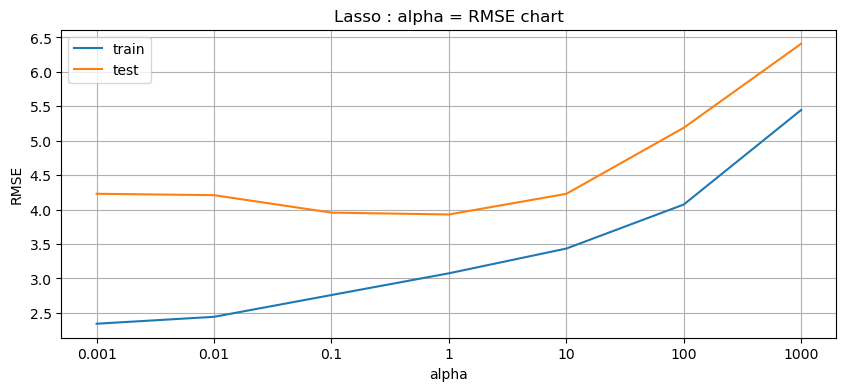

In [85]:
plt.figure(figsize=(10,4))
plt.plot(lasso_train_list, label='train')
plt.plot(lasso_test_list, label='test')
plt.title('Lasso : alpha = RMSE chart')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.xticks(np.arange(7), alpha_list)
plt.legend()
plt.grid()
plt.show()

In [87]:
# lidge 모델
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
ridge_train_list, ridge_test_list = [], []

for i in alpha_list :
    ridge_model = Ridge(alpha=i, max_iter=10000)
    ridge_model.fit(extended_X_train, y_train)

    # train
    ridge_train_pred = ridge_model.predict(extended_X_train)
    ridge_train_RMSE = mean_squared_error(ridge_train_pred, y_train)**0.5
    ridge_train_list.append(ridge_train_RMSE)

    # test
    ridge_test_pred = ridge_model.predict(extended_X_test)
    ridge_test_RMSE = mean_squared_error(ridge_test_pred, y_test)**0.5
    ridge_test_list.append(ridge_test_RMSE)

C:\Users\82108\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.53066e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


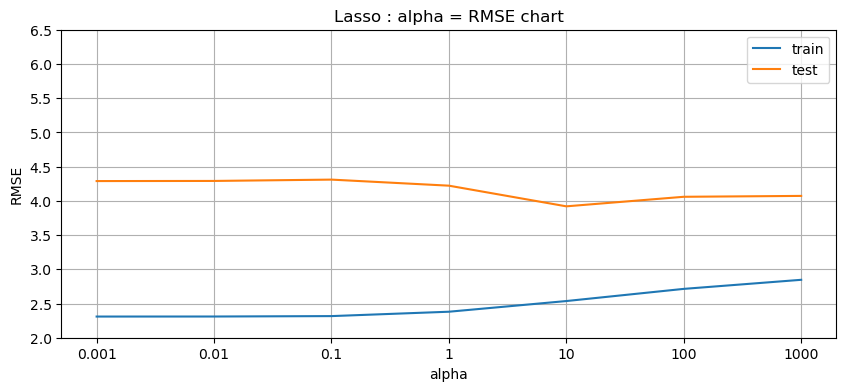

In [90]:
plt.figure(figsize=(10,4))
plt.plot(ridge_train_list, label='train')
plt.plot(ridge_test_list, label='test')
plt.title('Lasso : alpha = RMSE chart')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.xticks(np.arange(7), alpha_list)
plt.legend()
plt.ylim(2, 6.5)
plt.grid()
plt.show()

### 결론!
- 현재 보스턴 집값 데이터에서는 alpha가 10일 때, Ridge모델에 비해 Lasso모델의 train, test 오차값의 차이가 적기 때문에 과대적합에 더 유리한 모델과 하이퍼피라미터라고 볼 수 있음